<a href="https://colab.research.google.com/github/msremigio/projects_DataScience/blob/master/Exploratory_Analysis_Airbnb_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis: Airbnb Chicago
>> Airbnb accommodations listings in Chicago

[Airbnb](https://www.airbnb.com/) began in 2008 when two designers who had space to share, hosted three travelers looking for a place to stay. Today, even without owning no real state, Airbnb is considered as the world's largest accommodation provider.

Their interface creates an interaction between millions of hosts and travelers anywhere in the world. Hosts can list their space and travelers can book unique accommodations available in a desired location.

Everything related to the accommodation can be done through Airbnb platform (choosing a place, talking to the host, transfer payments and any other support issues).

The company also had the initiative to provide some of their available data through the [Inside Airbnb](http://insideairbnb.com/index.html) website. In this web page you can find datasets related to accommodations listed on Airbnb in many cities around the world so you are free to explore the data and do your own projects.

**In this notebook, I chose to work with Airbnb Chicago listings, just because I once used Airbnb services during a trip to Chicago in 2015. Let's see which insights can be extracted from the data available.**

![<a href="https://www.freepik.com/free-photos-vectors/logo">Logo vector created by freepik - www.freepik.com</a>](https://github.com/msremigio/projects_DataScience/blob/master/images/chicago.jpg?raw=true)

<a href="http://www.freepik.com">Designed by Rwdd_studios / Freepik</a>

# Data Acquisition

Let's begin by importing the libraries that we're going to use during the data exploration and by reading our data into a DataFrame structure using **Pandas**.

For this initial exploratory analysis we're going to use only the **listings.csv** file, which is a summarized version of a bigger listings file (listings.csv.gz).
* listings.csv - Summary information and metrics for listings in Chicago (good for visualisations)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

# Reading .csv file into a DataFrame structure
df = pd.read_csv('https://raw.githubusercontent.com/msremigio/projects_DataScience/master/datasets/airbnb/listings_chicago.csv')


# Data Exploratory Analysis

At this stage, let's understand what each variable represents, how they are statiscally distributed, search for missing values, outliers, correlation between variables and obtaing as many insights as we can.

**Features Dictionary**

* id - Unique ID number (primary key) used to identify an accommodation

* name - Accommodation name (how it appears on the Airbnb website)

* host_id - ID number of the accommodation host

* host_name - Name of the host

* neighbourhood_group - There is only missing values in this feature

* neighbourhood - Neighbourhood which the accommodation is located

* latitude - Latitude coordinate of the property

* longitude - Longitude coordinate of the property

* price - Per night price to book the accommodation

* minimum_nights - Minimum nights allowed to book the accommodation

* number_of_reviews - Number of reviews that the accommodation have

* last_review - Date of the last review made

* reviews_per_month - Number of reviews made per month

* calculated_host_listings_count - Number of accommodations that a given host have

* availability_365 - Number of days that the accommodation is available in 365 days

Let's give a look at these features by displaying the first 5 entries in the DataFrame:

In [0]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Walk to UChicago, 10 min train to McCormick Place",2613,Rebecca,NaN,Hyde Park,41.78886,-87.58671,Private room,50,2,176,2019-11-13,2.97,1,349
1,4505,One Great Apartment. 384 Great Reviews. 1 Bad ...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,117,1,390,2019-11-10,2.99,1,251
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,80,2,370,2019-11-04,2.93,1,328
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,49,2019-10-23,0.72,11,289
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79708,-87.59195,Private room,35,2,43,2019-10-28,0.70,5,258


Up to this point, by observing how the data is structured in the DataFrame we can start asking some questions that can be easily answered using **Pandas** library methods.

**Q1. How many rows (entries) and how many columns (features) are in the DataFrame?**

In [0]:
print(f'Entries:\t{df.shape[0]}')
print(f'Features:\t{df.shape[1]}')

Entries:	8533
Features:	16


**Q2. What are the variable types?**

In [0]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Given the **dtypes** output we can directly imply that the variables are organized as below:


*Numerical Features:*
 * **Discrete:**
  * id - host_id - price - minimum_nights - number_of_reviews - calculated_host_listings_count - availability_365
  
 * **Continuous:**
   * neighbourhood_group - latitude - longitude - reviews_per_month

*Categorical Features:*
  * name - host_name - neighbourhood - room_type - last_review


**Q3. There are missing values in the DataFrame? How many?**

In [0]:
print(f'{"Using the isnull() method":-^50}\n\n')
display(df.isnull().sum().sort_values(ascending=False))

# In percentage (if desired)
# display(((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False))

# You could use the info() method as well to answer Q2 and Q3 together
print(f'\n\n{"Using the info() method directly":-^50}\n\n')
df.info()


------------Using the isnull() method-------------




neighbourhood_group               8533
reviews_per_month                 1195
last_review                       1195
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
name                                 0
id                                   0
dtype: int64



---------Using the info() method directly---------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 16 columns):
id                                8533 non-null int64
name                              8533 non-null object
host_id                           8533 non-null int64
host_name                         8533 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     8533 non-null object
latitude                          8533 non-null float64
longitude                         8533 non-null float64
room_type                         8533 non-null object
price                             8533 non-null int64
minimum_nights                    8533 non-null int64
number_of_reviews                 8533 non-null int64
last_review                       7338 non-null object
reviews_per_month                 7338 non-null float64
calculated_host_listings_count    8533 non-null int64
availability_365  

The quality of a dataset is directly related to the number of missing values, so it's really important to check for them and for its meaningfulness compared to the number of entries.  

From this dataset we can easily tell that the **neighbourhood_group** variable column is entirely made of missing values (having no importance to our dataset).

Next, **reviews_per_month** and **last_reviews** variables come right below with **`1195`** missing values each (`≈ 14%`).

**Q4. There are outliers in the dataset?**

As a first step to investigate the dataset looking for outliers, we can use **Pandas** describe() method and observe the **min** and **max** parameters. This method also provide a basic statistical summary for numerical (default) and categorical (optionally included) variables. 

In [0]:
print(f'{"Describe method applied to numerical variables":-^100}\n')
display(df.describe())

print(f'\n{"Describe method applied to categorical variables":-^100}\n')
display(df.describe(include=['O']))

---------------------------Describe method applied to numerical variables---------------------------



,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.533000e+03,8.533000e+03,0.0,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,7338.000000,8533.000000,8533.000000
mean,2.568287e+07,9.136513e+07,NaN,41.900679,-87.664596,180.549162,5.577523,41.096215,2.518688,11.403375,177.255362
std,1.108914e+07,8.758527e+07,NaN,0.057041,0.041218,474.186707,21.054040,60.453440,2.097065,23.964151,130.468250
min,2.384000e+03,2.140000e+03,NaN,41.650990,-87.934660,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.805955e+07,1.572523e+07,NaN,41.874500,-87.686930,65.000000,1.000000,3.000000,0.860000,1.000000,64.000000
50%,2.769444e+07,5.597679e+07,NaN,41.902960,-87.661150,101.000000,2.000000,17.000000,2.030000,2.000000,162.000000
75%,3.538766e+07,1.572620e+08,NaN,41.940000,-87.634400,176.000000,2.000000,54.000000,3.710000,7.000000,323.000000
max,4.026441e+07,3.106326e+08,NaN,42.022280,-87.537900,10000.000000,1000.000000,603.000000,20.830000,119.000000,365.000000



--------------------------Describe method applied to categorical variables--------------------------



,name,host_name,neighbourhood,room_type,last_review
count,8533,8533,8533,8533,7338
unique,8389,2313,75,4,591
top,"UChicago, Shops + Eats, Lake | Gym + W&D | Zen...",Domio,West Town,Entire home/apt,2019-11-17
freq,14,122,1048,5772,539


Looking at the numerical variables statistics, we're able to see some strong indicatives of outliers in the dataset. In the **price** column there is an accommodation with `US$ 0.00` dollars price per night (maybe we can book this accommodation for free :] ). On the other hand, the maximum price per night of an accommodation is `US$ 10,000`, which can be a possible outlier, requiring further investigation to confirm this suspicion.

The next variable, **minimum_nights** also shows some strong indicatives of outliers, with accommodations requiring `1000` nights minimum for booking them.

At last, the variable **availability_365** tells us that there are accommodation(s) with `0` days availability in a `365` day period. Also a possible outlier.

Examining the categorical variables statistics we can infer that:

* Many hosts own more than one accommodation listed in Chicago, given that there are only `2313` unique hosts names in a `8533` dataset.

* Properties are listed in `75` different neighbourhoods and **West Town** is the neighbourhood with the greatest number of accommodations.

* There are only `4` types of accommodations and **Entire home/apt** is the most frequent type.

**Q5. How the numerical variables are statistically distributed?**

To do so, let's plot histograms for each numerical variable separately.


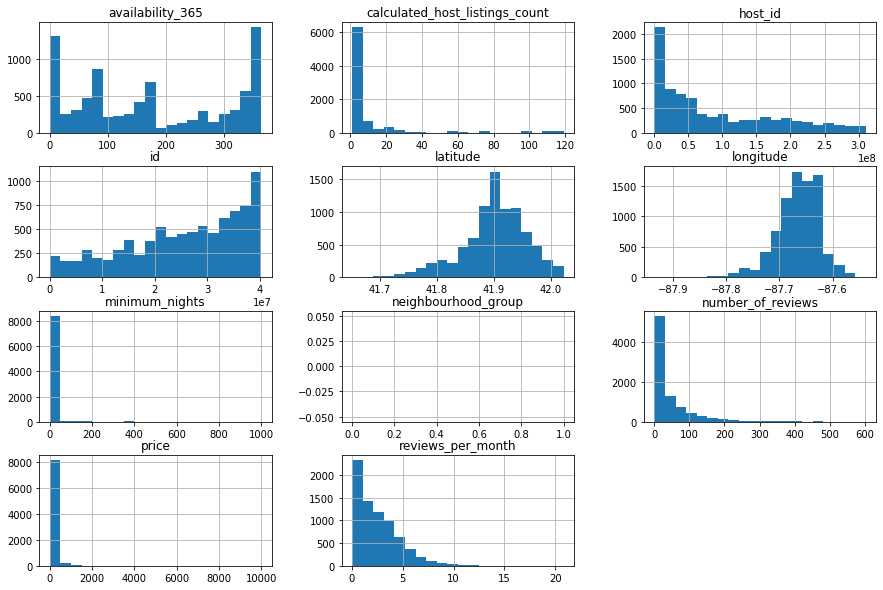

In [0]:
df.hist(bins=20, figsize=(15,10));

The visualization of variables through a histogram can also indicate the presence of outliers, see how the **price** and **minimum_nights** variables have a distoted histogram, clearing away the possibility of visualizing the real distribution these variables.

To identify, confirm and see outliers in the data, we can make use of **boxplots**. For example, let's give a look at the boxplot for each numerical variable that we suspected to have outliers (price, minimum_nights and availability_365):

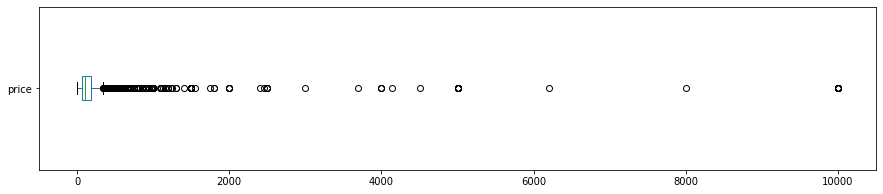

price: Entries above US$ X:
36 entries.
0.4219 %.


In [0]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# How many entries are above a US$ X price?
print('price: Entries above US$ X:')
print(f'{(df.price > 2000).sum()} entries.')
print(f'{(((df.price > 2000).sum()) / df.shape[0]) * 100:0.4f} %.')


We can see how many "outliers" are present in the **price** column. However, this doesn't mean that every single one of the outliers represent unreal data, some accommodations have a much greater price per night then others. But we can still observe prices far beyond this limit, and these samples need to be examined.   

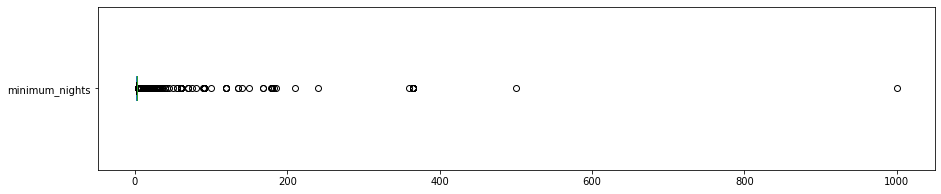

minimum_nights: Entries above 30 days
370 entries.
4.3361 %.


In [0]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# How many entries impose more than X minimum_nights?
print('minimum_nights: Entries above 30 days')
print(f'{len(df[df.minimum_nights > 30])} entries.')
print(f'{len((df[df.minimum_nights > 30]) / df.shape[0]) * 100:0.4f} %.')

Similar conclusion can be taken from the **minimum_nights** column. To book a specific accommodation a host may impose a number of minimum nights greater than the majority of other options, but there are some extravagant values that goes beyond a 365 days period.

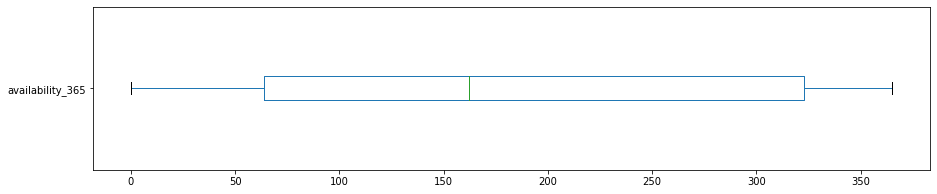

availability_365: Entries equal to 0
911 entries.
10.6762 %.


In [0]:
df.availability_365.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# How many entries are unavailable?
print('availability_365: Entries equal to 0')
print(f'{df[df.availability_365 == 0].shape[0]} entries.')
print(f'{(df[df.availability_365 == 0].shape[0] / df.shape[0]) * 100:0.4f} %.')

In the **availability_365** column we have a different situation. Apparently there are no outliers, but the lowest value is zero, which means that the accommodation is not available. So you may want to drop entry from the dataset,but we're not going to do that in this project. 

Now that we have identified the outliers in our dataset, let's remove them and visualize the filtered features distribution.

In [0]:
# Copying the DF to a new structure to do the changes
df_clean = df.copy() 

In [0]:
# Droping the neighbourhood_group column (it has no value)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Cleaning the extreme outliers from the dataset
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

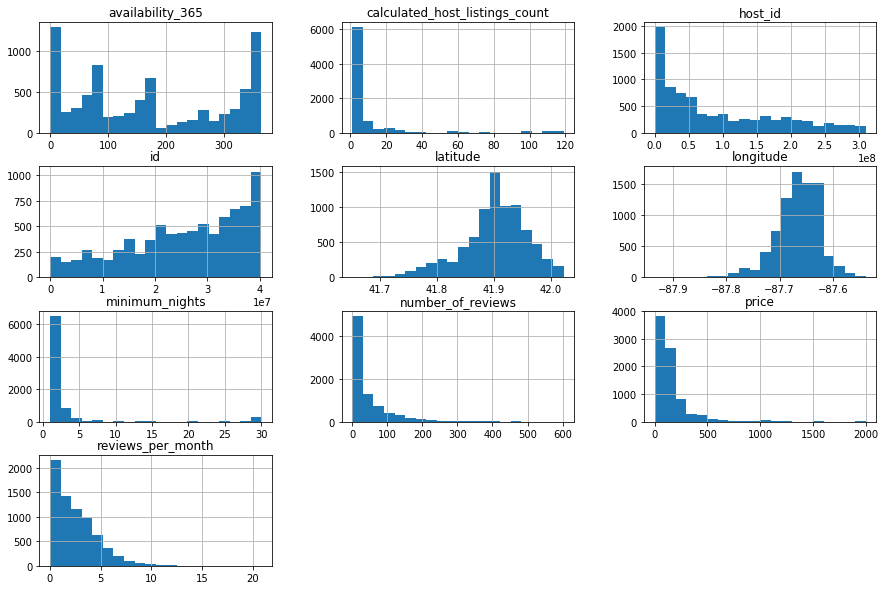

In [0]:
# Histogram after removing the outliers
df_clean.hist(bins=20, figsize=(15,10));

After removing the outliers we are able to see a better distribution for the **price** and **minimum_nights** variables.

Following the analysis, it's noticeable from the **describe** method output that **host_name** categorical variable indicate that groups of accommodations belong to the same host (and we can relate this info to the **host_id** and **calculated_host_listings_count** variables). And the **neighbourhood** variable shows that you can book an accommodation in `75` different neighbourhoods.

Let's use the **groupby** method to see these informations crossed.

In [0]:
# Top 5 hosts that own the most accommodations (host_name x using calculated_host_listings_cout)
print(f'{"Top 5 hosts that own the most accommodations":-^50}\n')
display(df_clean.groupby('host_name').calculated_host_listings_count.count().sort_values(ascending=False)[:5])

# Top 5 hosts that own the most accommodations (host_name x host_id)
print(f'\n{"Top 5 hosts that own the most accommodations":-^50}\n')
display(df_clean.groupby('host_name').host_id.count().sort_values(ascending=False)[:5])

# Accessing the top host 'host_id' 
print(f'\n{"Accessing the top host `host_id`":-^50}\n')
display(df_clean[df_clean.host_name == 'Domio'].host_id[:5])

---Top 5 hosts that own the most accommodations---



host_name
Domio         122
Blueground    119
Sonder        108
John          101
Michael        75
Name: calculated_host_listings_count, dtype: int64


---Top 5 hosts that own the most accommodations---



host_name
Domio         122
Blueground    119
Sonder        108
John          101
Michael        75
Name: host_id, dtype: int64


---------Accessing the top host `host_id`---------



2679    143825988
2782    143825988
2848    143825988
3135    143825988
3136    143825988
Name: host_id, dtype: int64

Above we're counting and displaying in a descending order the **host_name** variable grouped or crossed with the **calculated_host_listings_count** and **host_id** variables, in a way that we can confirm the five hosts that own the largest number of accomodations in Chicago. The same result was obtained in both cases (as expected), and with this information we can have access to the **host_id** of these hosts.  

In [0]:
# Average price per neighbourhood 
print(f'{"Average price per neighbourhood":-^50}\n')
display(df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:5])

# Number of accommodations per neighbourhood
print(f'\n{"Number of accommodations per neighbourhood":-^50}\n')
display(df_clean['neighbourhood'].value_counts(ascending=False)[:15])

---------Average price per neighbourhood----------



neighbourhood
Near South Side    321.518750
Near North Side    252.195567
Loop               218.491315
Lincoln Park       204.578692
Lake View          189.301273
Name: price, dtype: float64


----Number of accommodations per neighbourhood----



West Town          1023
Near North Side     767
Lake View           707
Logan Square        565
Near West Side      424
Lincoln Park        413
Loop                403
Uptown              268
Lower West Side     256
Edgewater           209
Irving Park         209
Avondale            186
North Center        173
Rogers Park         171
Near South Side     160
Name: neighbourhood, dtype: int64

Also using the **groupby** method we are able to see which neighbourhoods have a greater average price in `US$`.

Specially if you're not familiar with the city you want to visit, it's also interisting to count which neighbourhoods provide a greater number of options and analyze this information together with the average price, because a more expensive region in average may not imply in a better located area, for example.

In [0]:
# Displaying the most frequent room types in Chicago
print(f'{"Percentage of each room_type":-^50}\n')
display(df_clean.room_type.value_counts(ascending=False) / df_clean.shape[0] * 100)

-----------Percentage of each room_type-----------



Entire home/apt    67.084871
Private room       29.655597
Shared room         1.968020
Hotel room          1.291513
Name: room_type, dtype: float64

Lastly, as a matter of curiosity we are displaying above the most frequent types of accommodations available in Chicago.

Next, let's find out relationships between variables that we udge to be relevant. To do that we measure the correlation coefficient and display the result in the form of a heatmap. Positive correlation values indicate a directly proportional relation between features and negative values express a inversely proportional relation. 

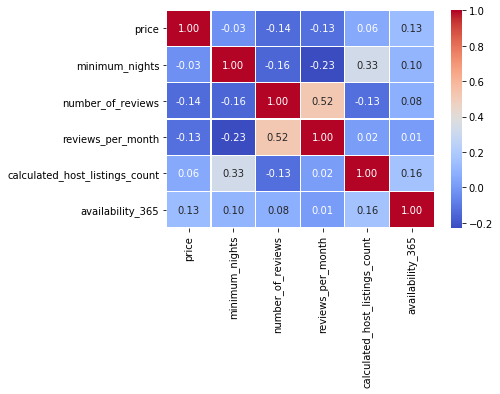

In [0]:
# Selecting the desired features and plotting a heatmap
corr_vars = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
sns.heatmap(df_clean[corr_vars].corr(), annot=True, cmap='coolwarm', linewidths='0.2', linecolor='white', fmt='0.2f');

Plotting a **scatter matrix** is another way of visualizing relationships between variables. Notice how **number_of_reviews** and **reviews_per_month** features show some pattern when crossed with each other and how this corresponds with the correlation coefficient in the heatmap.  

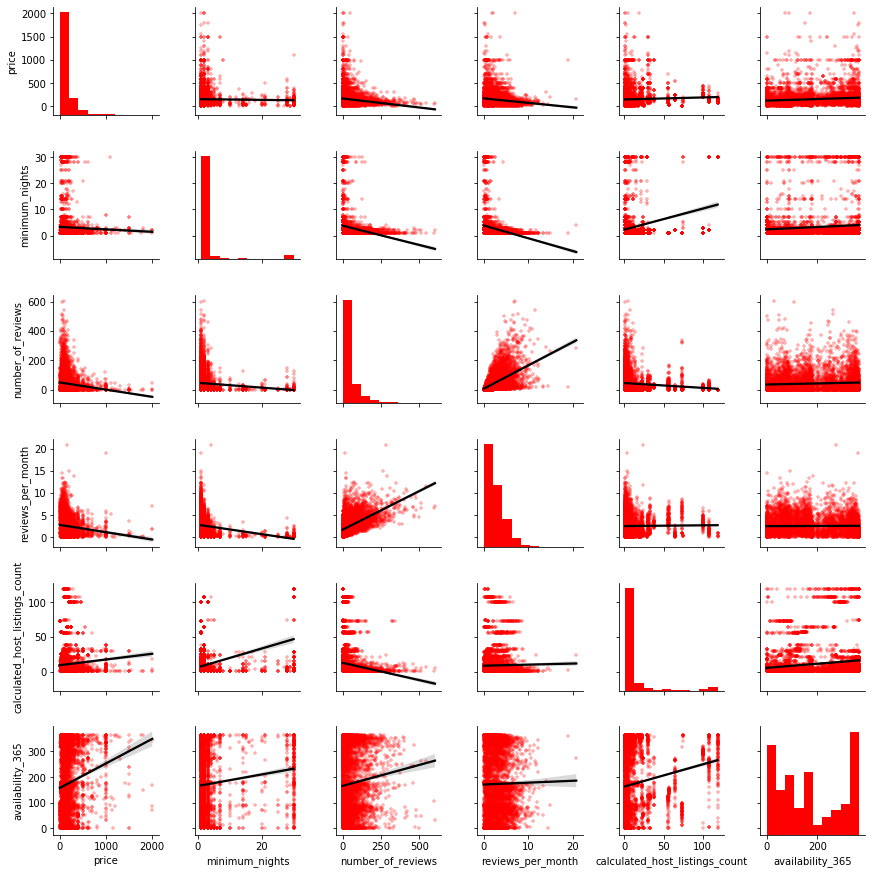

In [0]:
# Plotting a scatter matrix of important features
sns.pairplot(df_clean[corr_vars], height=2, kind='reg', markers='+',
                  plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'color': 'red', 'alpha': 0.3, 's': 10}},
                  diag_kws={'color': 'red'});

To wrap up our data exploratory analysis, let's take advantage of the **latitude** and **longitude** features given in the dataset and plot a map to see how the accommodations available in Chicago are distributed throughout the city.

In [62]:
# Showing the map of Chicago and how the accommodations are distributed in the city
Map = px.scatter_mapbox(df_clean, lat='latitude', lon='longitude', color='room_type', size='price', animation_group='price', size_max=12, zoom=10)
Map.update_layout(mapbox_style="carto-darkmatter")
Map.show()

# Closure

This was an initial exploratory analysis done on a summarized dataset made available by Airbnb. The data represents real information and it's an excellent learning material where you can exercise many Data Science fundamental concepts.

However, to do a more complete analysis and proceed to more advanced steps of a project (as creating a training a ML model, for example) it's worth looking at the complete dataset with `106` features and that can also be found at the same [webpage](http://insideairbnb.com/index.html), mentioned during the introduction.